# Итерационные методы

Во многих прикладных задачах мы сталкиваемя с решением линейных систем или анализом матриц, размер которых настолько велик, что матрицу невозможно разместить целиком в памяти, или матрица в памяти еще размещается, но время работы рассмотренных ранее алгоритмов для LU, QR, SVD, разложения Шура и других выходит за разумные рамки. На практике пройденные ранне алгоритмы для работы с заполненными матрицами хорошо работают для матриц с числом строк и столбцов порядка $10^3-10^4$, для матриц большего размера нужны новые подходы. К счастью, довольно часто мы имеем дело с *разреженными* матрицами, т.е. матрицами, имеющими большое число нулевых элементов. Например, разреженные матрицы возникают при дискретизации дифференциальных операторов. Для хранения разреженной матрицы используют специальные форматы, которые сохраняют значение матричного элемента вместе с его положением, а нулевые элементы вообще не храняться, что может значительно (на порядки) снизить требуемый для хранения объем памяти. Проблема в том, что ранее изученные алгоритмы не сохраняют структуру разреженной матрицы и в процессе их выполнения матрица становится заполненной, тем самым теряются всякие преимущества работы с разреженной матрицой. 

В ряде случаев хранить матрицу вообще не требуется, так как известен алгоритм (обычно весьма простой), как умножить матрицу на вектор, в котором информация о матрице хранится неявно. Например, конечные разности легко вычисляются алгоритмически, записывать коэффициенты соответствующей матрицы нет необходимости. Разреженную матрицу также можно быстро умножить на вектор, так что разреженные матрицы также можно отнести к рассматриваемому случаю. Если кроме умножения матрицы на вектор мы ничего с матрицей делать не можем, то единственным возможным действием будет последовательное умножение матрицы на вектора, возникающие на ранних шагах алгоритма, тем самым естественным образом возникают *итерации* и итерационные алгоритмы. 

Ранее изучаемые нами алгоритмы позволяли получать в точной арифметике точные значения для решения системы, собственных векторов и чисел, определителей и т.п. Итерационные методы вообще говоря предназначены для получения приближенного ответа, хотя в ряде случаев и могут дать точное решение (например, метод сопряженного градиента). Если точное решение не требуется, то итерационные методы часто применяются и для решения задач небольшой размерности, для которой возможно применение и неитерационных методов, для уменьшения времени расчета.

Итерационных методах координатное представление матрицы не важно, так как методы строят вспомогательный базис,
в котором удобнее проводить расчеты.
Поэтому далее мы будем просто писать $A$ для обозначения линейного оператора, не заботясь о какой-либо записи матрицы этого оператора.
Будем обозначать $Ax$ действие оператора $A$ на произвольный вектор $x$, другими словами $Ax$ есть произведение матрица $A$ и вектора $x$.
В ряде методов требуется вычисление $A^Tx$, но вычисление транспонированной матрицы $A^T$ для алгоритмически заданной матрицы $A$
обычно не получается провести автоматически, поэтому при необходимости, мы будем считать заданной функцию для вычисления произведения $A^Tx$
для произвольного вектора $x$.

Для проведения тестов мы будем использовать трехмерный [оператор Лапласса](https://ru.wikipedia.org/wiki/Оператор_Лапласа) 
$$
\Delta=\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}+\frac{\partial^2}{\partial z^2}
$$
в дискретизации [центральными конечными разностями](https://ru.wikipedia.org/wiki/Конечные_разности) на сетке $(x_i,y_j,z,k)=(ih,jh,kh)$:
$$Ax_{i,j,k}=h^{-2}(x_{i+1,j,k}+x_{i-1,j,k}+x_{i,j+1,k}+x_{i,j-1,k}+x_{i,j,k+1}+x_{i,j,k-1}-6x_{i,j,k}).$$
Будем считать область ограниченной $0\leq x\leq 1$, $0\leq y\leq 1$, $0\leq z\leq 1$,
на границе которой заданы [условия Дирихле](https://ru.wikipedia.org/wiki/Граничные_условия_Дирихле).
Положим шаг $h=1/N$, тогда граничные условия принимают вид: 
$$x_{0,j,k}=x_{N,j,k}=0,\quad x_{i,0,k}=x_{i,N,k}=0,\quad x_{i,j,0}=x_{i,j,N}=0\forall i,j,k=0\ldots N.$$
Мы используем три индекса у вектора $x$ для удобства записи оператора.
Вместо тройного индекса можно было бы использовать один индекс $n$, соответствующий хранению координат в памяти:
$$
n=k+N(j+Ni),
$$
но в таком случае запись оператора $A$ была бы значительно более громоздкой.
В качестве примера линейной системы рассмотрим дискретный вариант
[уравнения Пуассона](https://ru.wikipedia.org/wiki/Уравнение_Пуассона):
$$Ax=b,$$
где в качестве правой части возьмем 
$$b_{i,j,k}=\left(\frac iN-\frac12\right)^2+\left(\frac jN-\frac12\right)^2+\left(\frac kN-\frac12\right)^2.$$

## Задания 

1. Реализуйте функцию, вычисляющую $Ax$, где $A$ -\- вышеуказанная дискретизация оператора Лапласса.
Реализуйте функцию, вычисляющую $A^Tx$ на произвольном векторе $x$.

2. Решите дискретизованное уравнение Пуассона выше с помощью функции [`scip.sparse.linalg.spsolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.spsolve.htm). 



## Задание 1

In [3]:
from func import Laplace, B, Laplace_first
import numpy as np

In [4]:
b = B(3)
print("Direct multiplication:\n")
print(Laplace_first(3).mul3d(b))

print("\n Transpose Matrix multiplication:\n")
print(Laplace_first(3).mul3d_T(b))

Direct multiplication:

[[[-26.25 -11.5  -18.25]
  [-11.5   -0.75  -5.5 ]
  [-18.25  -5.5  -10.25]]

 [[-11.5   -0.75  -5.5 ]
  [ -0.75   6.     3.25]
  [ -5.5    3.25   0.5 ]]

 [[-18.25  -5.5  -10.25]
  [ -5.5    3.25   0.5 ]
  [-10.25   0.5   -2.25]]]

 Transpose Matrix multiplication:

[[[-26.25 -11.5  -18.25]
  [-11.5   -0.75  -5.5 ]
  [-18.25  -5.5  -10.25]]

 [[-11.5   -0.75  -5.5 ]
  [ -0.75   6.     3.25]
  [ -5.5    3.25   0.5 ]]

 [[-18.25  -5.5  -10.25]
  [ -5.5    3.25   0.5 ]
  [-10.25   0.5   -2.25]]]


По сути все итерационные методы можно свести к приближению оператора $A$ его аппроксимацией на подпространстве небольшой размерности, и решением исходной задачи для этой аппроксимации, что требует меньше времени. В качестве такой аппроксимации может служить сужение оператора на некоторое подпространство, т.е. мы извлекаем некоторую подматрицу, соответствующую действию оператора на заданном подпространстве.
Так как кроме применения оператора к векторам мы ничего делать не можем, то в качестве подпространства обычно выбирают 
$$
    K(A,q,m) = \mathrm{span}(q,Aq,\ldots,A^{m-1}q),
$$
называемое $m$-ым пространством Крылова, построенном на векторе $q$.

# Задания

3. Какова размерность пространства $K(A,b,m)$, если $A$ - дискретизация лаплассиана, определенная выше?

4. Запишите матрицу $\tilde A_m$ сужения оператора $A$ на пространство Крылова $K(A,b,m)$ в базисе $e_k$:
$$e_0=b,\quad e_1=Ae_0,\quad e_{k+1}=Ae_k.$$
Как раскладывается $Ae_{m-1}$ по векторам $e_0,\ldots,e_{m-1}$?

5. Найдите проекцию $\tilde b$ вектора $b$ на подпространство Крылова $K(A,b,m)$ и решите систему $\tilde A_m \tilde x=\tilde b$
из $m$ уравнений.
Вложите вектор $\tilde x$ обратно в $N^3$ мерное пространство и оцените погрешность решения уравнения $Ax=b$. 
 

# Задание 3

$\dim (K(A, b, m)) \leq m$ так как векторы $q,Aq,\ldots,A^{m-1}q$ могут быть ЛЗ

# Задание 4

Получим матрицу, у которой под главной диагональю 1-цы, однако последний столбец не обязательно будет такой (последний вектор может выражаться через остальные)

# Задание 5

In [5]:
from scipy.sparse import diags
from func import compute_krylov_basis

In [6]:
# n = 100

# diagonals = [[-2]*n, [1]*(n-1), [1]*(n-1)]

# A_diagonal = diags(diagonals, [0, -1, 1])

# A = A_diagonal.toarray()

# b = np.array([(i/n - 1/2)**2 for i in range(n)])


n = 10

A = Laplace(n)
A.shape = (n**3, n**3)
b = B(n).flatten()

In [7]:
m_max = 10

krylov_basis = compute_krylov_basis(A, b, m_max)

for m in range(1, m_max):
    cond_number = np.linalg.cond(krylov_basis[:,:m])
    print("{0}: {1:2.1e}".format(m, cond_number))

1: 1.0e+00
2: 2.4e+02
3: 1.0e+05
4: 6.3e+07
5: 4.4e+10
6: 3.5e+13
7: 2.9e+16
8: 1.4e+20
9: 1.1e+22


Ссылка на авторитетный источник:

"An important measure of the usefulness of a basis is its conditioning. It measures how linearly independent vectors are. A condition number close to `1`
 means that the basis is well behaved. A condition number close to `1e16`
 means that the basis is numerically singular (this is related to the fact that standard double precision has around 16 digits of accuracy)."


Как можем видеть, базис "сильно ЛЗ"

____

Как вы могли убедиться, работать в неортогональном базисе $e_0,\ldots,e_m$ довольно сложно.
Поэтому на практике в пространстве Крылова обычно строится ортонормированный базис $g_0,\ldots, g_m$,
где $g_0=e_0/\|e_0\|$, а остальные вектора получают [процедурой ортогонализации Грама-Шмидта,](https://ru.wikipedia.org/wiki/Процесс_Грама_―_Шмидта) так что 
$$
\mathrm{span}(e_0,\ldots q_k)=\mathrm{span}(g_0,\ldots, g_k)\forall k.
$$
Алгоритм построения такого базиса называют [итерациями Арнольди](https://ru.wikipedia.org/wiki/Итерация_Арнольди),
а в случае [симметрических операторов](https://ru.wikipedia.org/wiki/Эрмитов_оператор) [методом Ланцоша](https://en.wikipedia.org/wiki/Lanczos_algorithm). 

## Задания

6. Реализуйте метод Ланцоша и найдите ортонормированный базис в пространстве $K(A,b,m)$.
Убедитесь, что матрица $A_m$ оператора $A$ в этом базисе трехдиагональна.

7. Найдите разложение $b_m$ вектора $b$ по построенному базису и решите систему $A_m x_m=b_m$.
Вложите вектор $x_m$ обратно в $N^3$-мерное пространство и найдите ошибку решения. 
Сравните решение с полученным в задании 5.
 

# Задание 6-7


In [8]:
from func import lanczos, compute_krylov_basis_orthogonal, fom
from matplotlib import pyplot as plt

In [9]:
krylov_basis = compute_krylov_basis_orthogonal(A, b, m_max)

for m in range(1, m_max):
    cond_number = np.linalg.cond(krylov_basis[:,:m])
    print("{0}: {1:2.1e}".format(m, cond_number))

1: 1.0e+00
2: 1.0e+00
3: 1.0e+00
4: 1.0e+00
5: 1.0e+00
6: 1.0e+00
7: 1.0e+00
8: 1.0e+00
9: 1.0e+00


In [10]:
x, V, error = fom(A, b, m_max=20)

Text(0, 0.5, 'residuals')

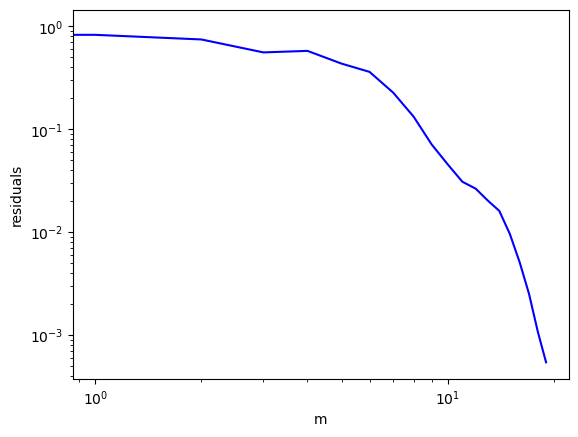

In [11]:
plt.loglog(error, color='blue')
plt.xlabel('m')
plt.ylabel("residuals")

Для вычисления приближенного решения уравнения сведением его к уравнению в пространстве меньшей размерности используется 
[метод Петрова-Галеркина](https://en.wikipedia.org/wiki/Petrov–Galerkin_method).
Суть метода заключается в следующем.
Пусть дано уравнение $Ax=b$.
Зададимся парой подпространств $K$ и $L$ одинаковой размерности.
Будем искать решение только в пространстве $K\ni x$.
Точное решение в общем случае не лежит в пространстве $K$, поэтому мы можем найти только приближенное решение.
В методе Галеркина в качестве критерия оптимальности выступает условие ортогональности невязки пространству $L$:
$$
(b-Ax)\cdot y=0\,\forall y\in L.
$$
Грубо говоря, в методе оператор $A$ сужается до оператора из $K$ в $L$ и ищется решение для суженного оператора,
что требует гораздо меньше времени, чем исходная задача, если размерность $K$ мала.
В заданиях выше мы брали $L=K=K(A,b,m)$, однако другие варианты могут иметь свои преимущества.

## Задания

8. Используйте $K=K(A,b,m)$, $L=A K$ и решите уравнение Пуассона метода Петрова-Галеркина. 
Оцените ошибку получившегося решения.
Получающийся метод имеет название [GMRES](https://en.wikipedia.org/wiki/Generalized_minimal_residual_method).
Убедитесь, что этот подход минимизирует невязку по всем $x\in K$.

9. Оцените время работы алгоритма как функцию от $m$.

# Задание 8

In [12]:
from func import GMRES
from scipy.sparse.linalg import gmres
from func import Operator

In [14]:
A_8 = np.array([[1, 0, 0],
              [0, 2, 0],
              [0, 0, 3]])


b_8 = np.array([1, 4, 6])

x0 = np.zeros(b.shape)

print("MY GMRES: ", GMRES(A_8, b_8, np.zeros_like(b_8), 100))

print("Scipy's GMRES: ",gmres(A_8, b_8, np.zeros_like(b_8), 1e-8))

d:\python\matrices_labs\lab_5\func.py:299: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  y, residuals, rank, s = np.linalg.lstsq(H[:j+2, :j+1], betta * e1)


MY GMRES:  (array([1., 2., 2.]), 5.8332059735608005e-15)
Scipy's GMRES:  (array([1., 2., 2.]), 0)


In [15]:
# для лапласа 

GMRES(A, b, np.zeros_like(b), 100)[1]

8.245752504088928e-09

In [16]:
import timeit

In [17]:
A_first = Laplace_first(10)

In [18]:
import warnings

warnings.simplefilter('ignore')

In [19]:
%%timeit
GMRES(A, b, np.zeros_like(b), 100)

22.4 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
%%timeit
GMRES(A_first, b, np.zeros_like(b), 100)

215 ms ± 5.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Параметр $m$ размерности пространства Крылова в алгоритмах выше никак не оговаривался.
Однако для вычисления решения с заданной точностью нужно выбрать достаточно большое $m$, 
однако при работе с большими $m$ теряются преимущества итерационных методов.
На практике $m$ увеличивают постепенно до достижения требуемой точности. 
Однако повторять все вычисления для каждого нового $m$ слишком дорого.
Одна из самых дорогих операций - это ортогонализация всех векторов базиса.
Объем вычислений можно уменьшить ценой потери точности, если требовать ортогональность только 
небольшого фиксированного числа последних добавленных векторов,
см. подробнее главу 6.4.2 в Саад. 
Если матрица трехдиагональна, то вектора Арнольди связаны рекуррентным соотношением,
связывающим три последовательных вектора.
Это значит, что можно не хранить больше трех векторов и производить операции только с ними,
см. подробности в Саад, глава 6.4.2 и глава 6.5.7. 

## Задание

10. Реализуйте алгоритм DQGMRES (Саад, 6.13). 
Сравните результат с результатом алогритма GMRES при фиксированном $m$.
Постройте график изменения ошибки решения с ростом $m$.


Кроме решения систем уравнений итерационные методы часто используются для приближенного вычисления собственных значений.
Для оценки собственных значений можно использовать [метод Ритца](https://en.wikipedia.org/wiki/Ritz_method)
(см. Голуб 10.1.4).
Самые большие и самые маленькие собственные числа трехдиагональной матрицы хорошо оценивают соответствующие собственные числа всей матрицы $A$,
см. оценки сходимости в Голуб 10.1.5.

## Задание

11. Используйте метод Ланцоша для построения трехдиагональной матрицы сужения оператора $A$ на пространство Крылова $K(A,q,m)$
для некоторого вектора $q$.
Найдите наименьшее собственное значение трехдиагональной матрицы и сравните с наименьшим собственным значением оператора Лапласа.
Изучите, как изменяется ошибка, как функция от размерности $m$ пространства Крылова.


# Литература

1. Yousef Saad. Iterative methods for sparse linear systems. 2nd Edition, 2000.

2. G.H. Golub and C.F. Van Loan. Matrix Computations, 4th Edition, 2012.


